# Dotin EDA : Mouse Track Heatmaps

In [13]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
import seaborn as sns

In [2]:
import os 

In [3]:
os.listdir('../Data/Clean Data')

['.DS_Store',
 '.ipynb_checkpoints',
 'merged_data_user_level.csv',
 'merged_data_user_level_V2.csv',
 'mouse_flat_v2.csv',
 'mouse_flat_V3.csv',
 'mouse_flat_V4.csv',
 'mouse_user_direction.csv',
 'Untitled.ipynb',
 'votes_v2.csv',
 'votes_V3.csv']

In [4]:
#call in data
mt=pd.read_csv('../Data/Clean Data/mouse_flat_V3.csv')
v=pd.read_csv('../Data/Raw/votes.csv')

In [5]:
#Create two new features to capture x,y coordinates but improved, to account for variability in window size

#ratio of cord_x / window_x * 100 - % of width
mt['percent_cord_x']=(mt['cord_x']/mt['window_x'])*100

#ratio of cord_y / window_y * 100 - % of length
mt['percent_cord_y']=(mt['cord_y']/mt['window_y'])*100

**Overall Mouse Activity Heatmap Per User**

In [6]:
def overall_heatmap (userid):
    user_cords=mt[mt.user_id==userid]
    cords=user_cords[['cord_x', 'cord_y', 'window_x', 'window_y']]
    
    x= user_cords['percent_cord_x'].to_numpy()
    y= user_cords['percent_cord_y'].to_numpy()
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    print(userid)
    plt.clf()
    plt.imshow(heatmap.T, extent=extent, origin='lower')
    plt.show()

365


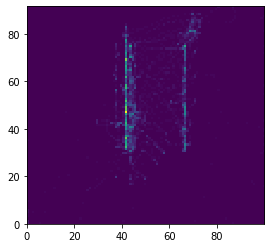

371


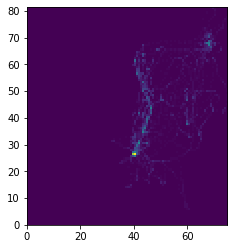

390


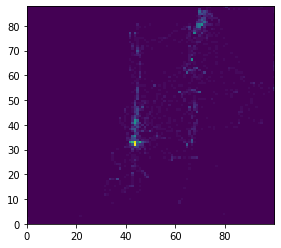

376


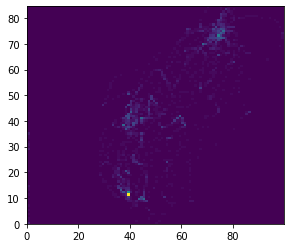

396


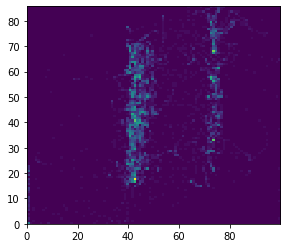

374


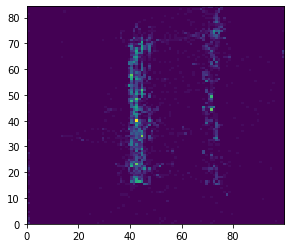

383


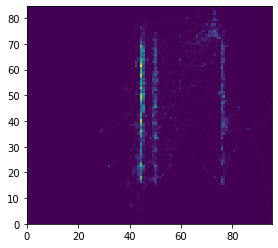

385


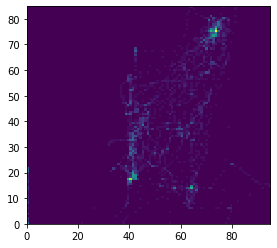

379


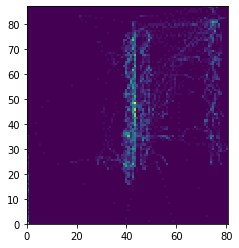

373


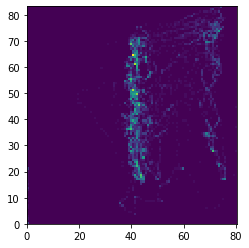

386


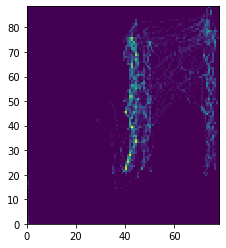

423


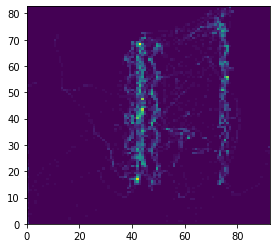

395


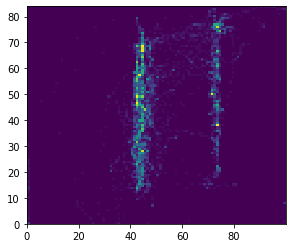

378


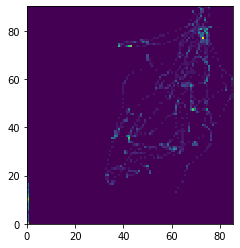

384


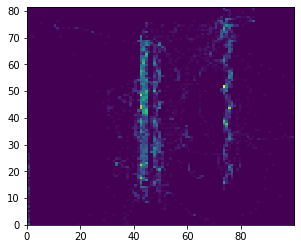

400


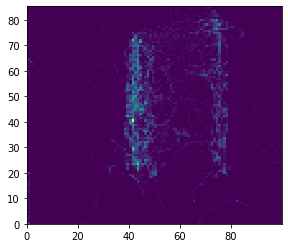

388


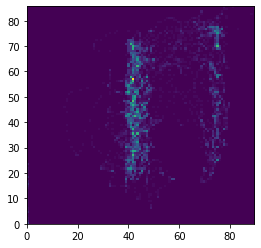

422


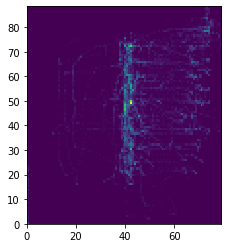

496


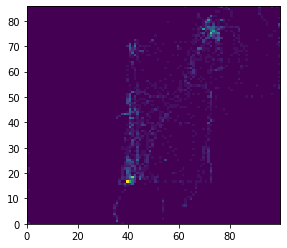

401


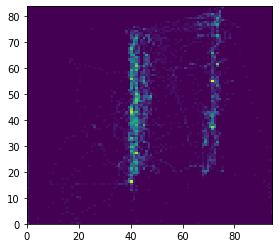

428


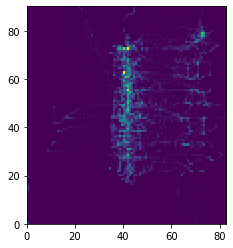

501


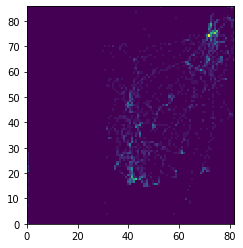

500


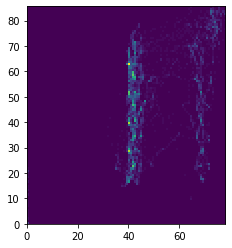

527


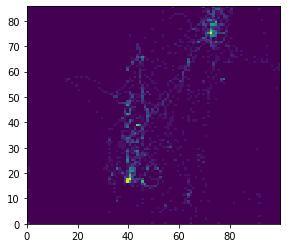

435


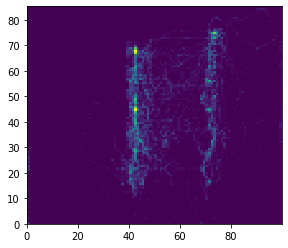

377


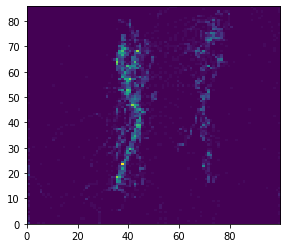

521


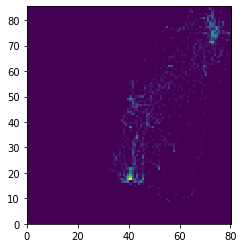

413


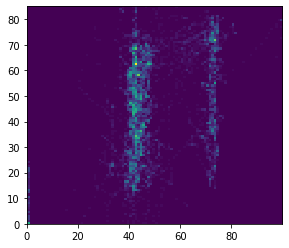

444


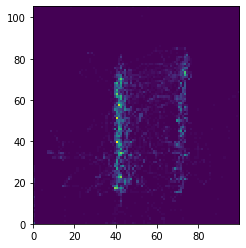

522


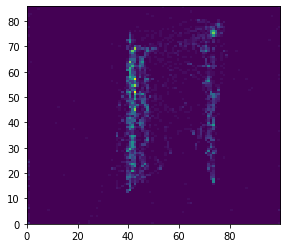

542


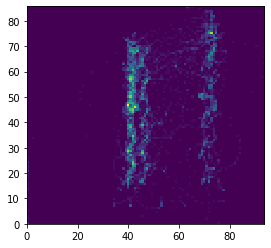

375


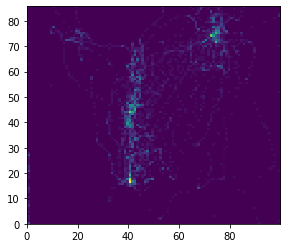

481


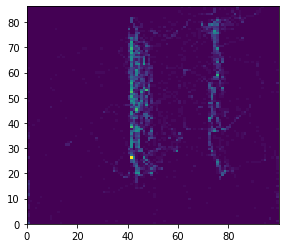

519


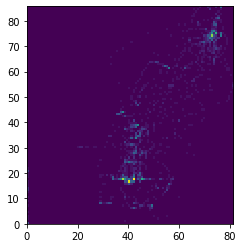

532


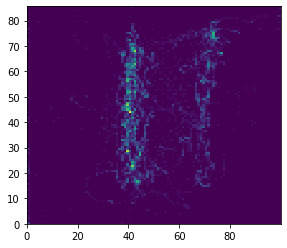

415


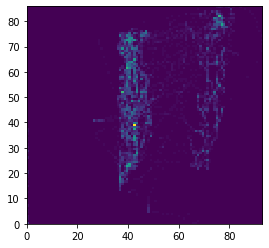

397


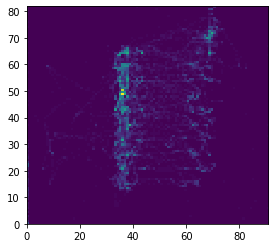

404


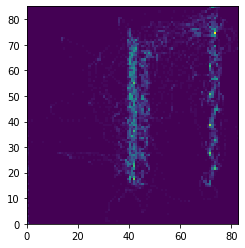

382


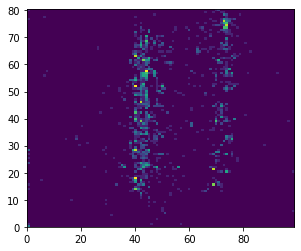

523


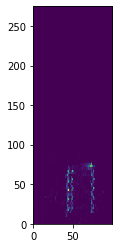

407


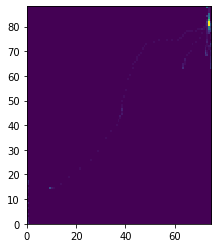

447


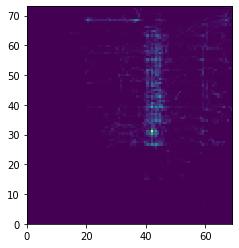

504


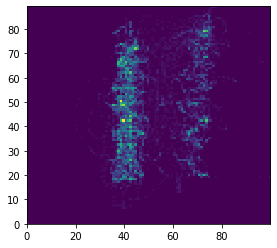

393


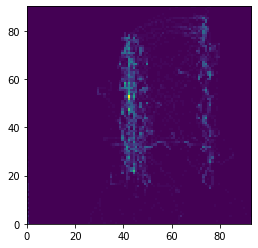

552


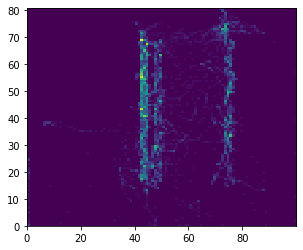

530


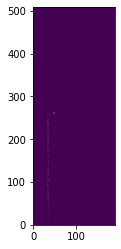

578


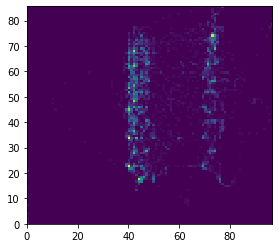

594


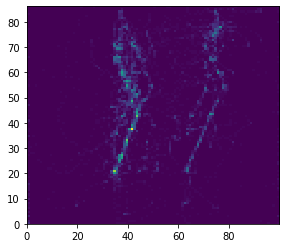

598


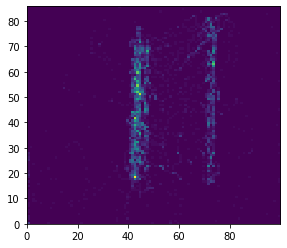

438


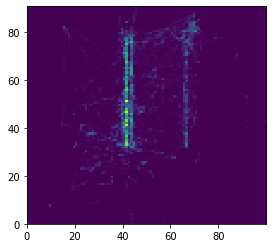

464


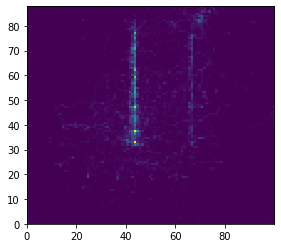

392


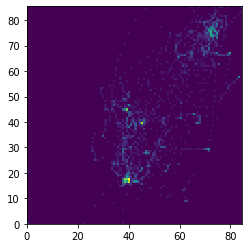

461


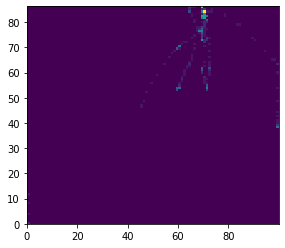

494


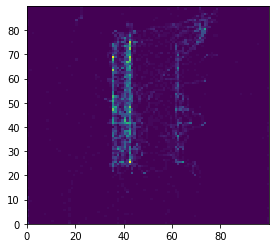

546


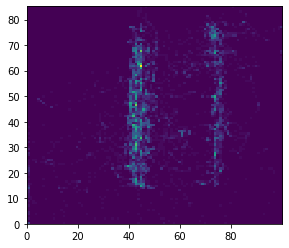

448


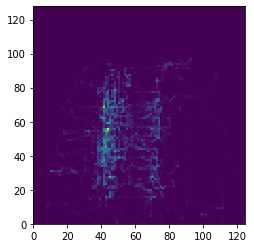

517


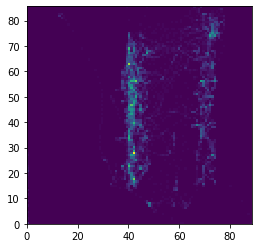

551


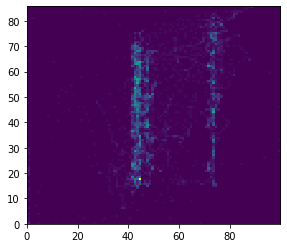

557


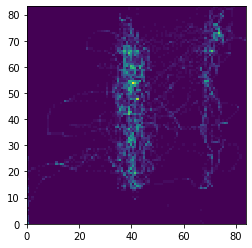

565


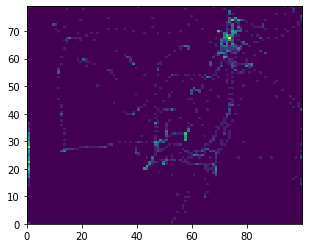

471


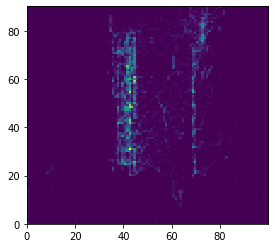

564


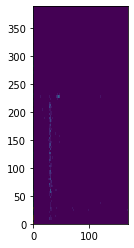

507


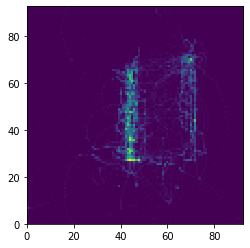

579


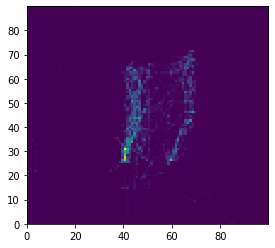

584


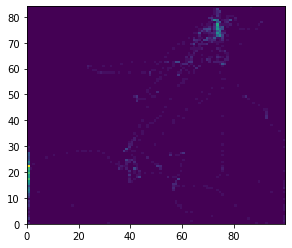

465


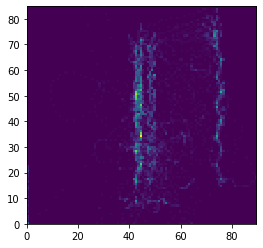

563


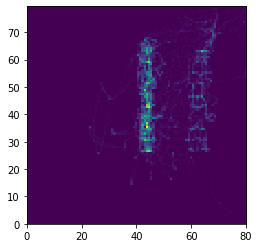

591


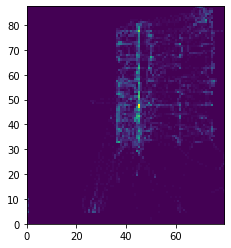

607


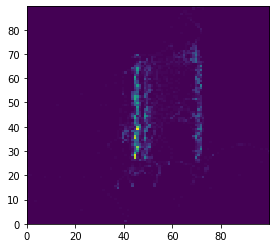

571


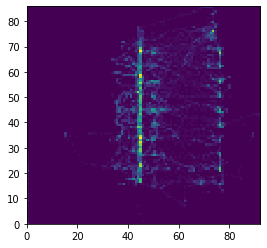

600


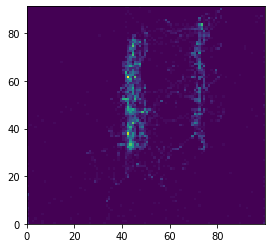

540


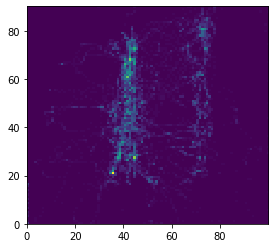

441


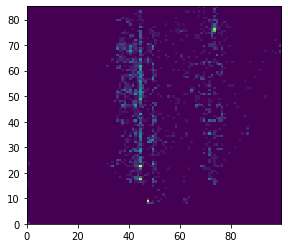

550


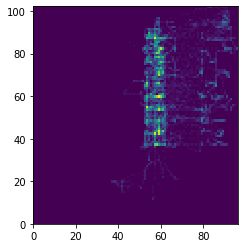

592


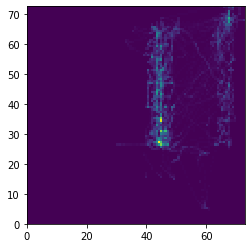

616


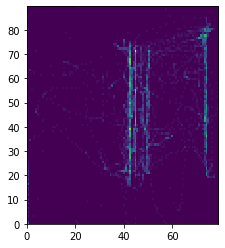

602


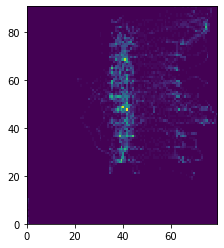

614


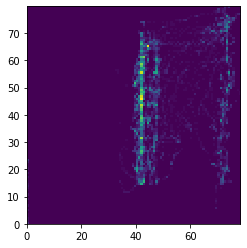

604


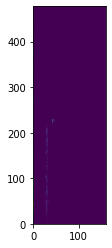

505


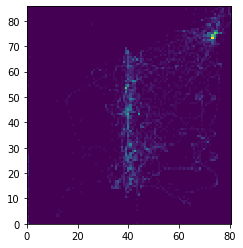

620


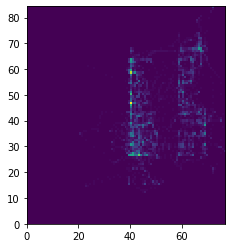

549


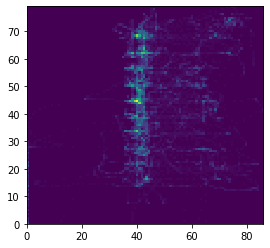

534


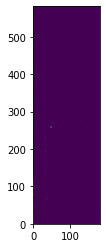

612


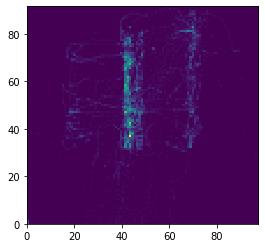

489


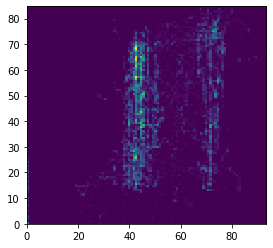

573


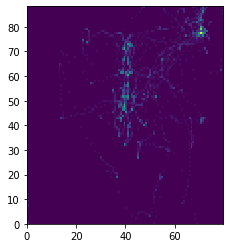

605


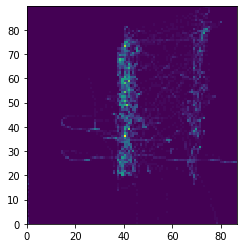

570


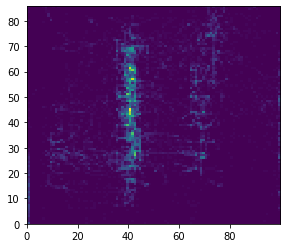

595


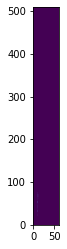

621


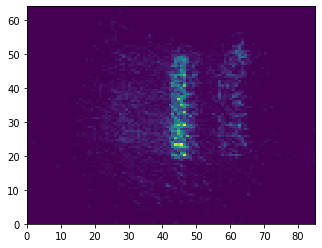

624


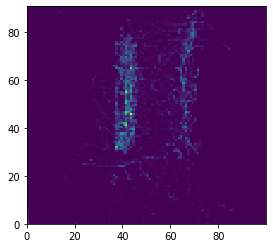

608


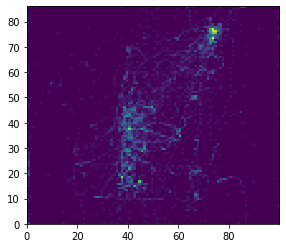

493


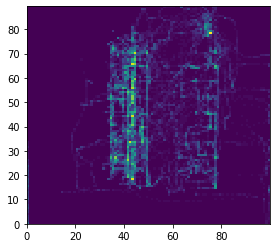

536


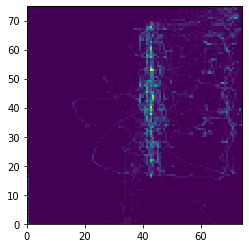

639


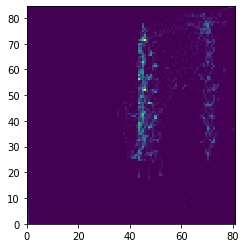

642


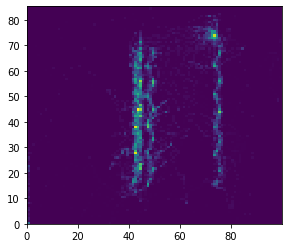

645


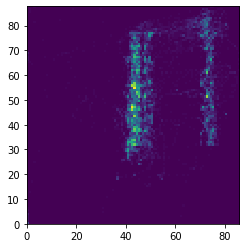

628


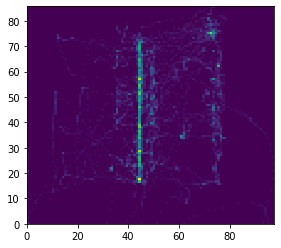

627


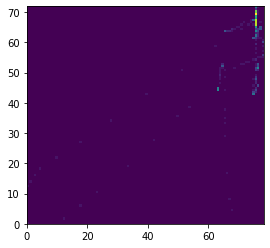

647


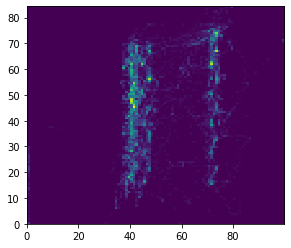

654


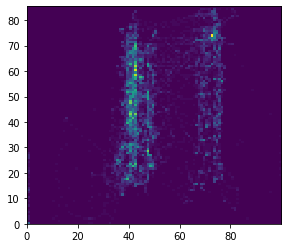

652


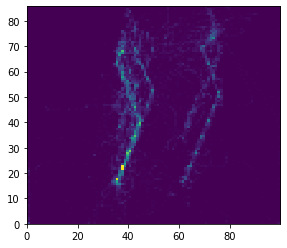

667


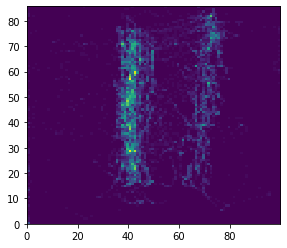

646


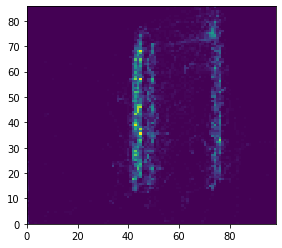

683


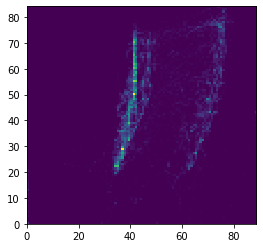

673


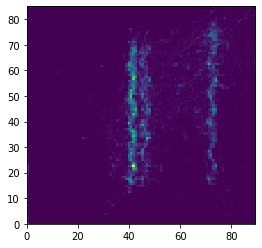

640


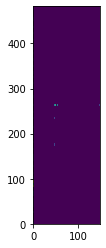

664


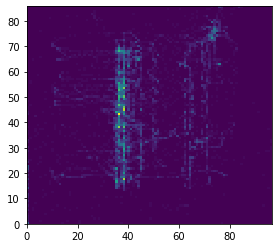

632


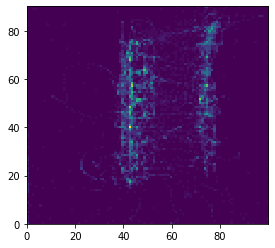

704


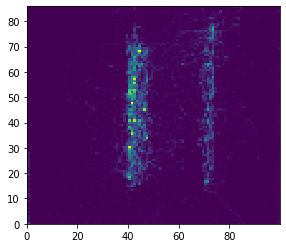

718


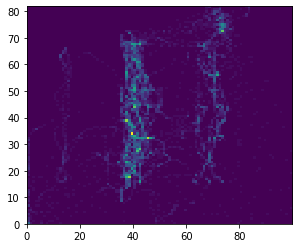

659


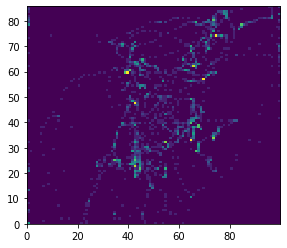

728


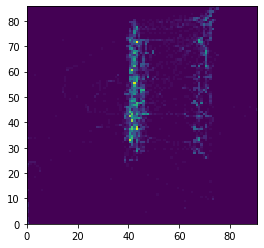

641


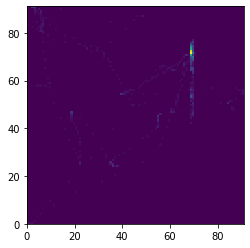

727


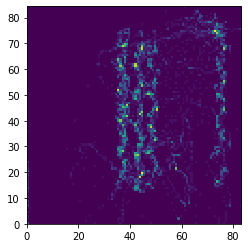

794


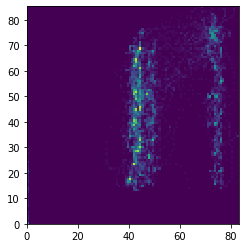

685


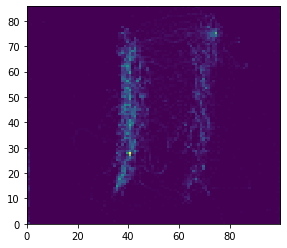

749


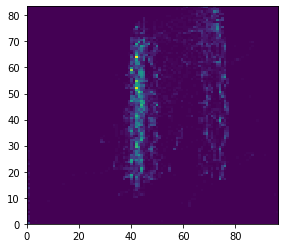

700


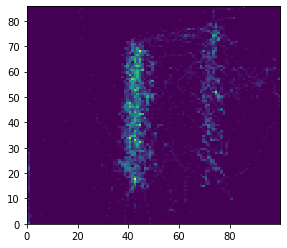

798


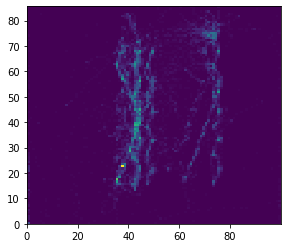

803


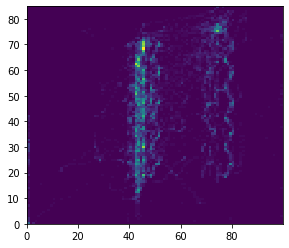

796


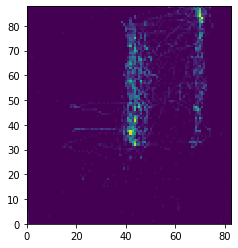

839


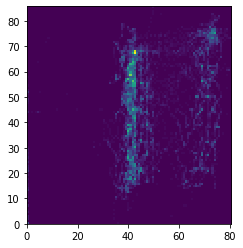

869


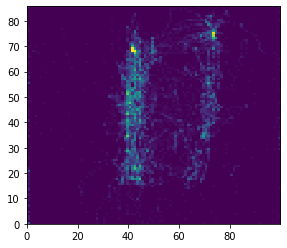

867


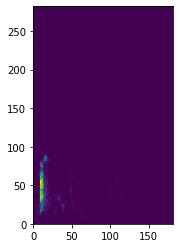

866


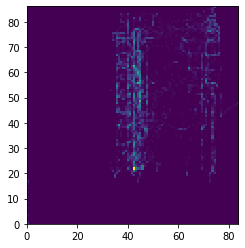

877


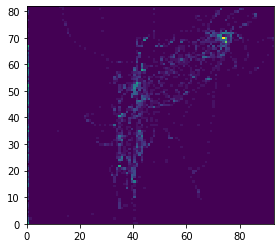

793


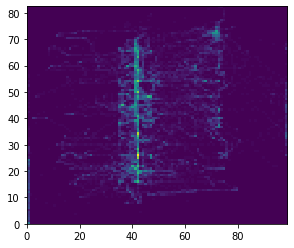

852


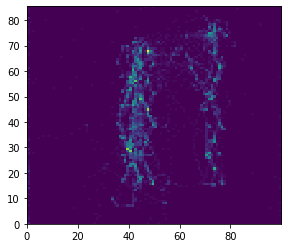

865


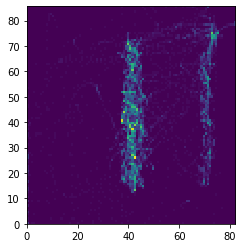

854


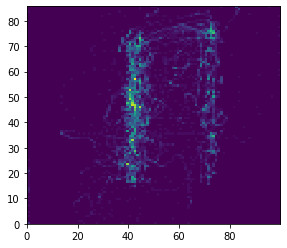

901


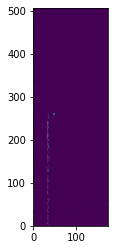

863


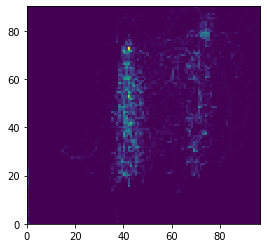

891


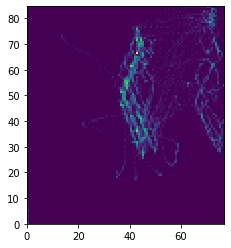

931


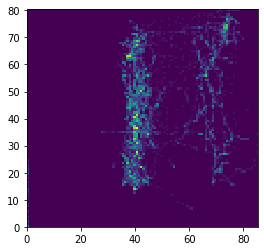

875


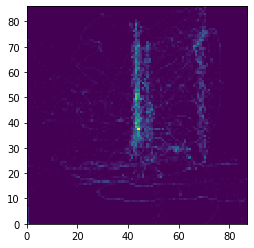

879


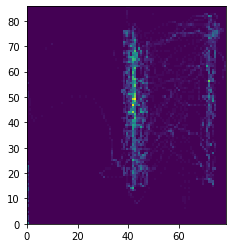

923


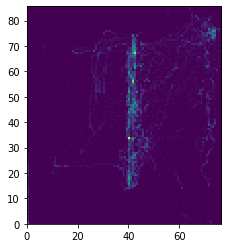

868


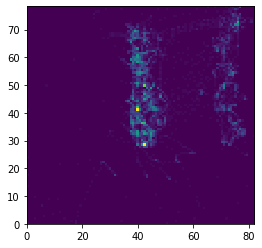

880


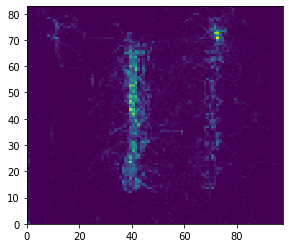

900


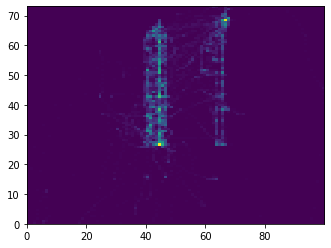

962


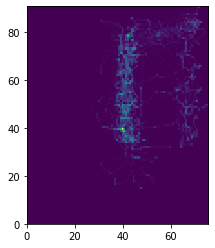

883


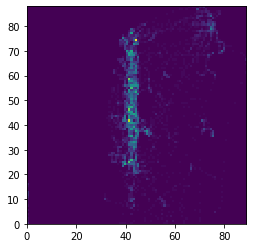

878


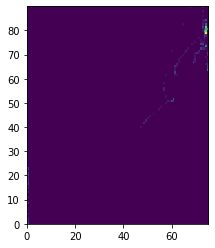

897


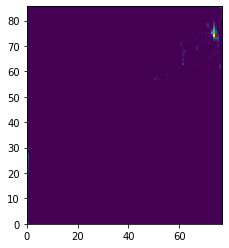

872


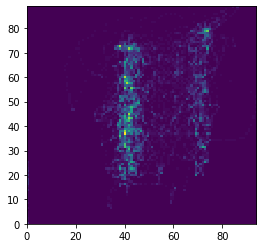

894


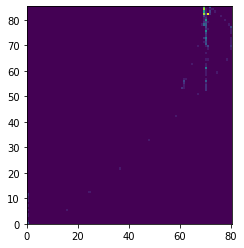

862


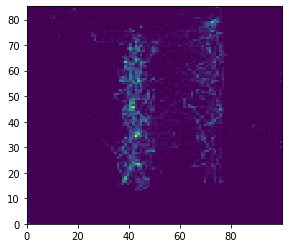

949


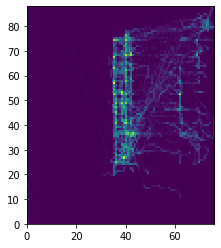

946


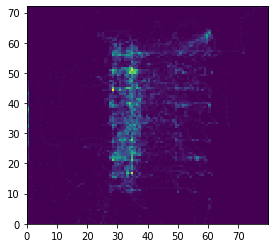

938


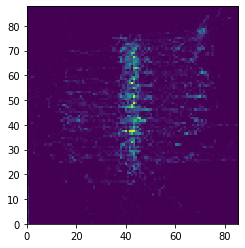

922


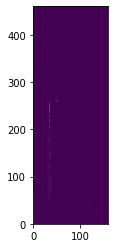

887


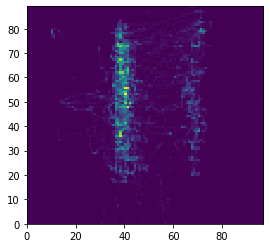

764


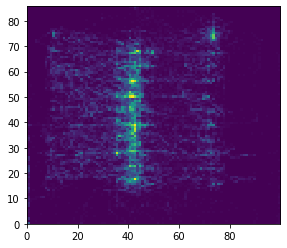

890


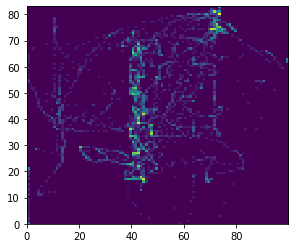

974


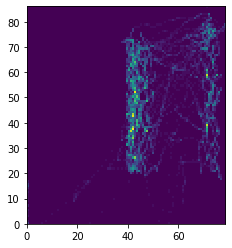

955


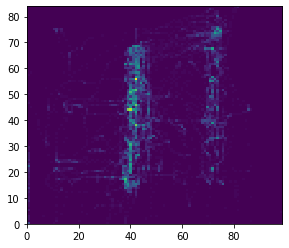

934


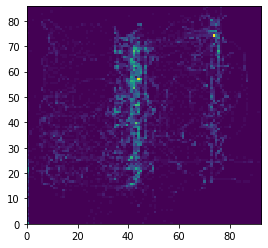

932


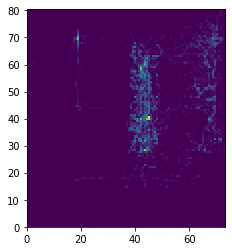

959


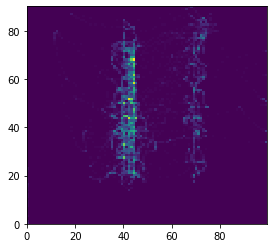

958


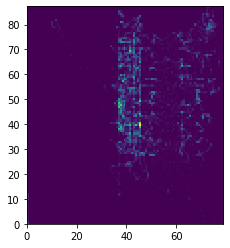

972


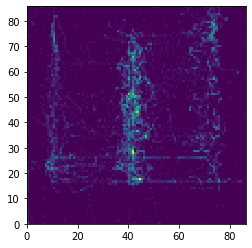

885


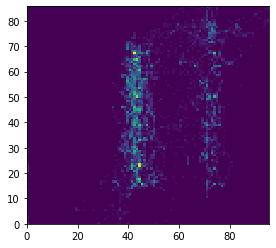

953


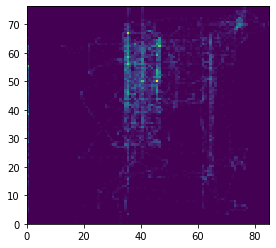

943


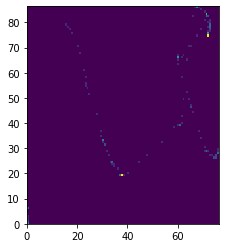

982


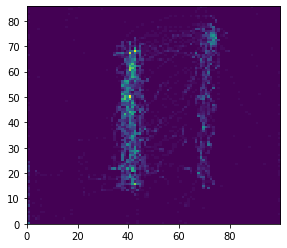

971


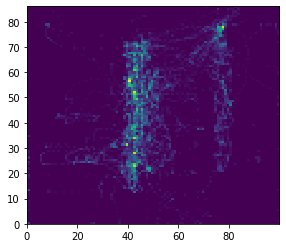

964


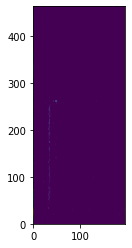

904


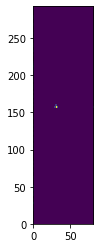

849


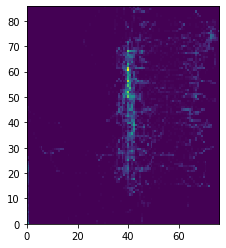

752


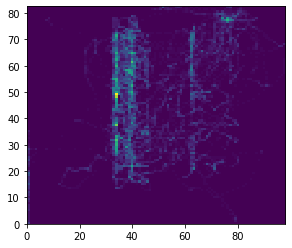

999


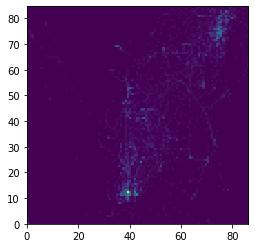

994


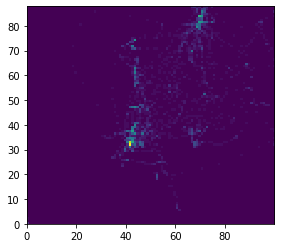

1000


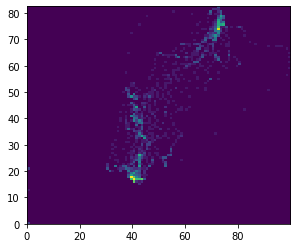

993


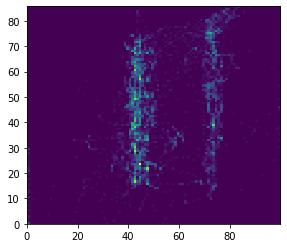

799


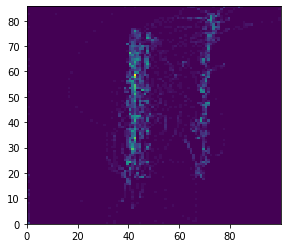

989


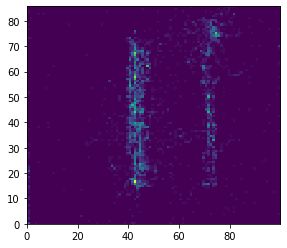

995


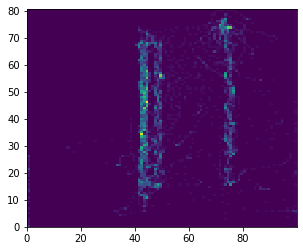

990


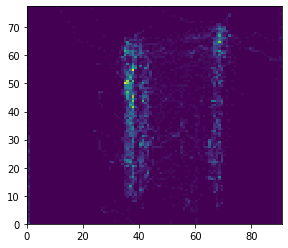

686


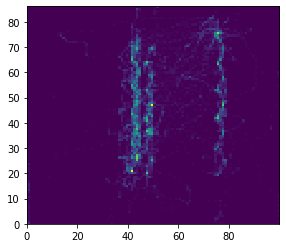

997


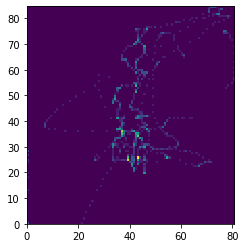

778


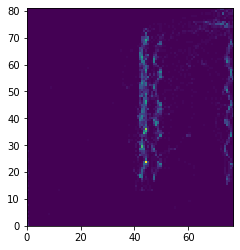

1011


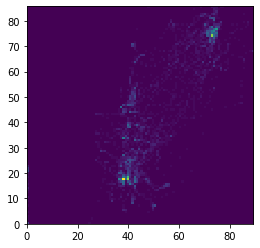

1029


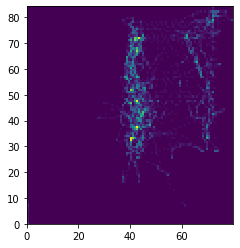

810


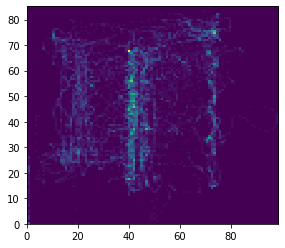

717


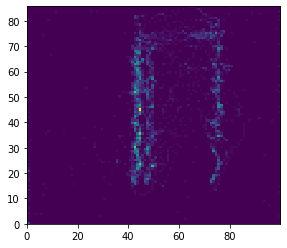

1015


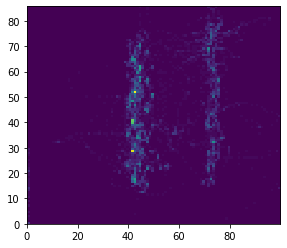

1073


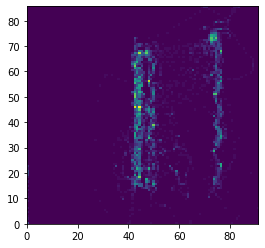

1025


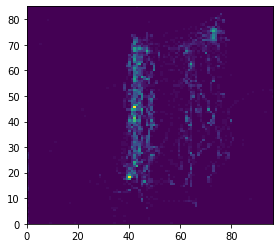

1033


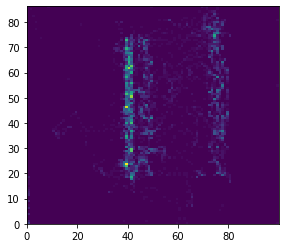

1049


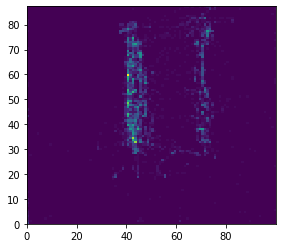

1046


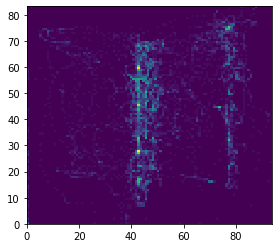

1027


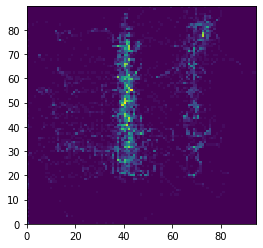

1020


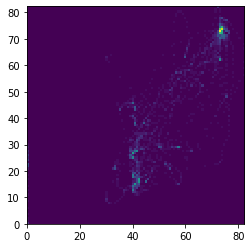

1047


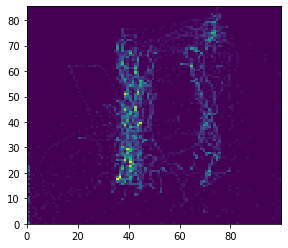

1024


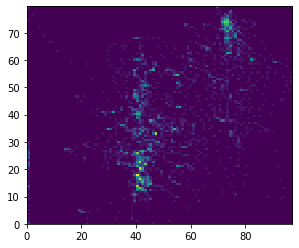

1089


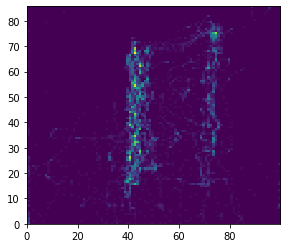

1103


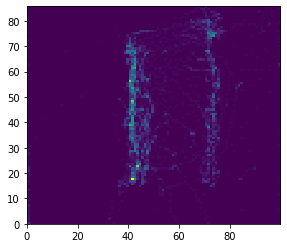

1022


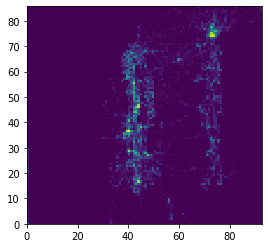

1043


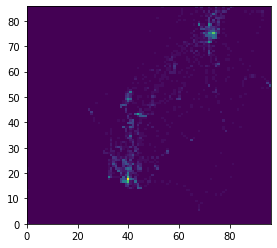

1111


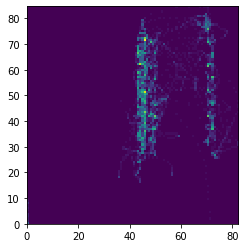

1006


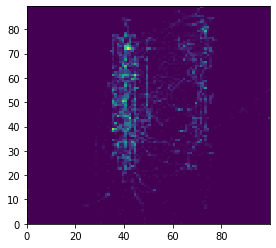

1071


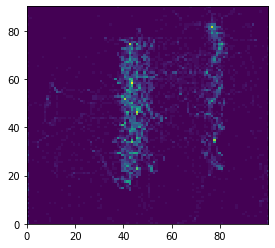

1008


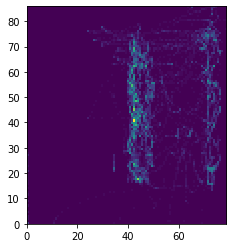

1051


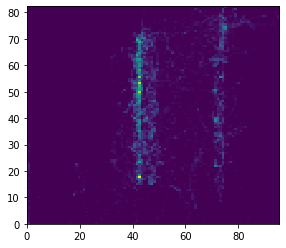

1077


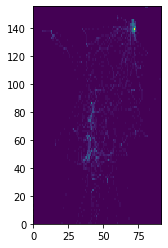

1101


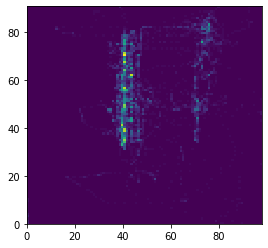

1017


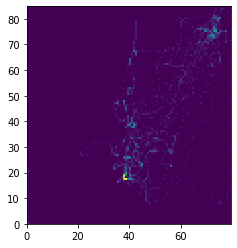

1110


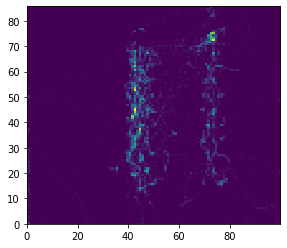

1053


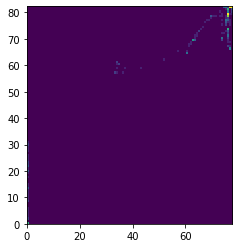

1019


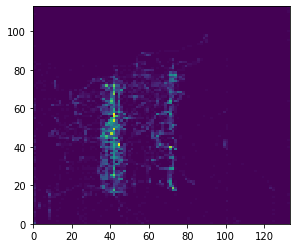

1114


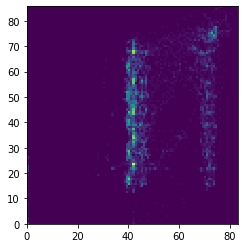

630


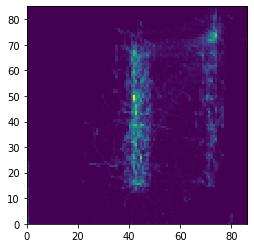

691


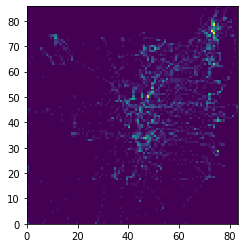

936


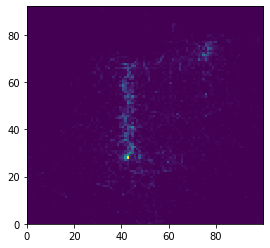

1001


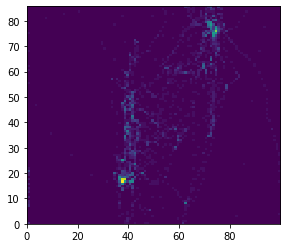

1082


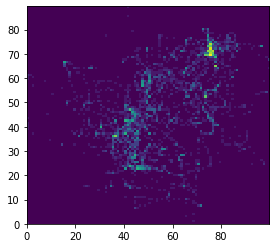

1112


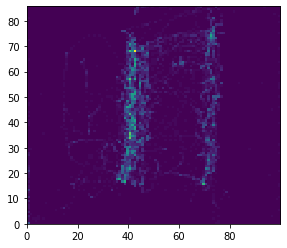

1105


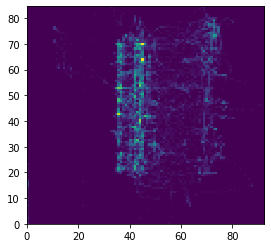

773


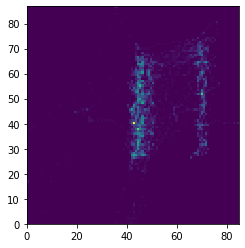

1102


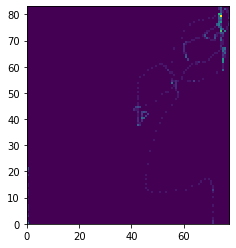

1108


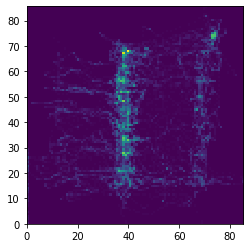

1125


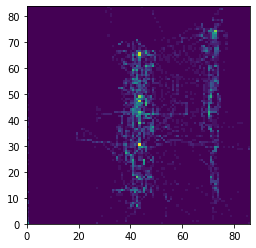

1104


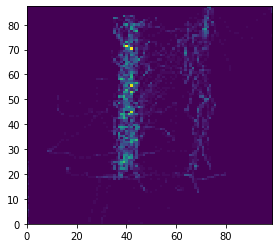

1147


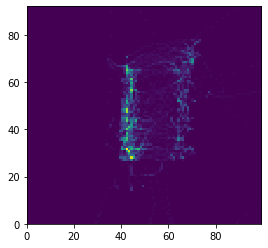

1124


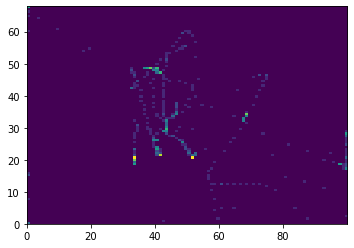

1154


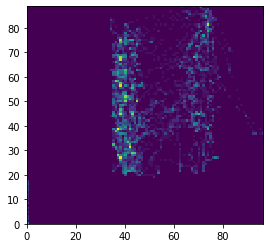

1151


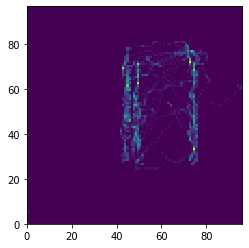

1120


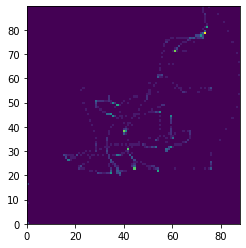

1115


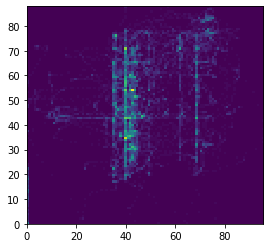

1146


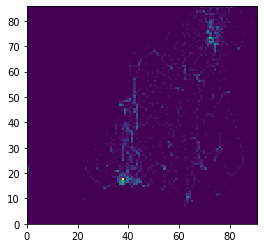

1150


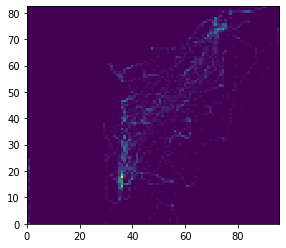

1153


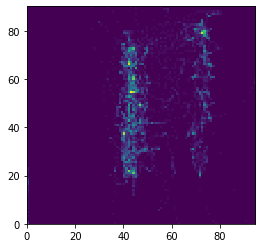

785


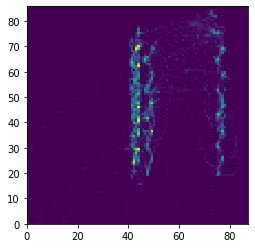

1173


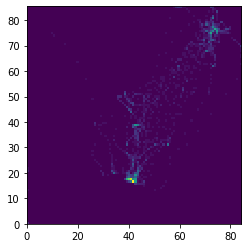

1122


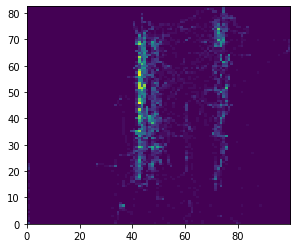

1132


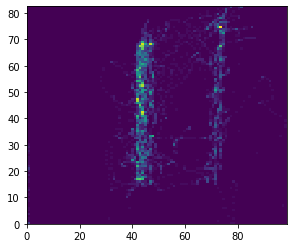

1119


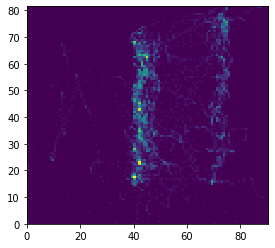

1161


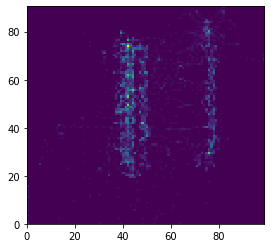

1145


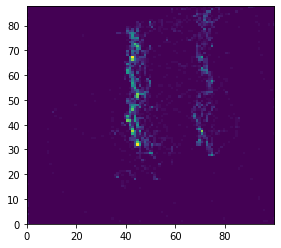

1156


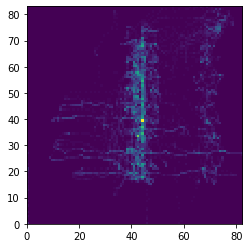

1174


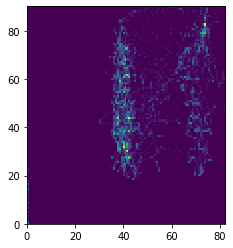

1096


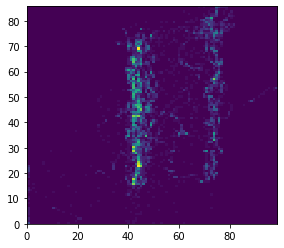

1155


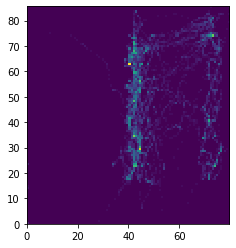

1158


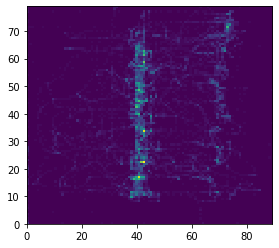

1131


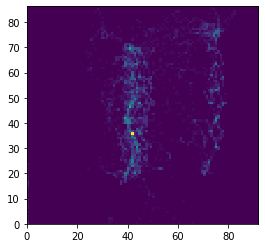

1121


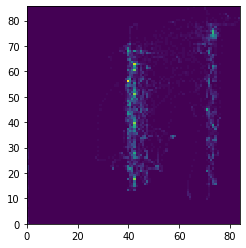

1182


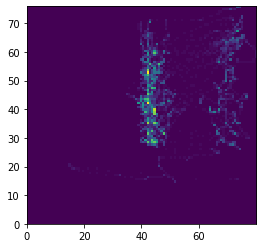

1127


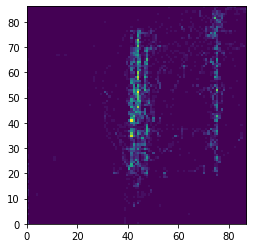

1128


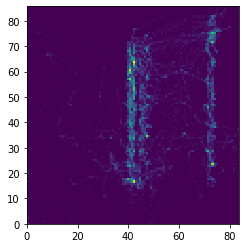

1165


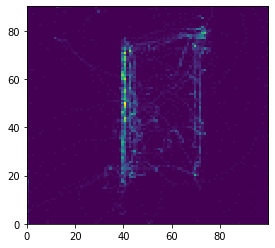

1130


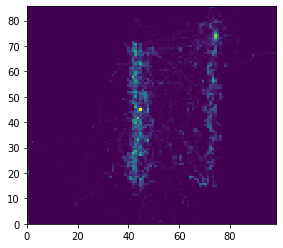

1181


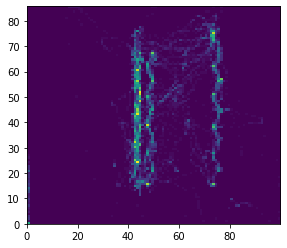

1164


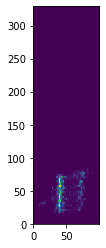

1171


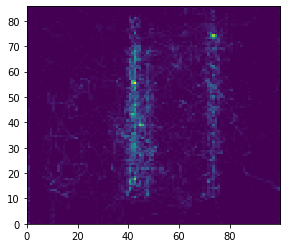

1186


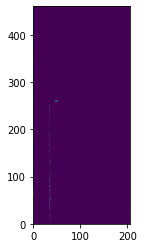

1169


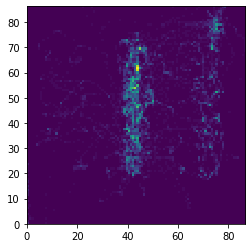

1168


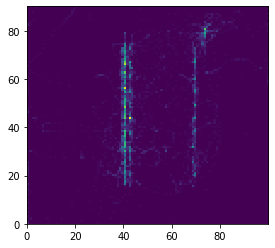

1176


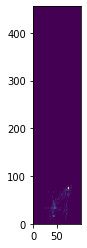

1196


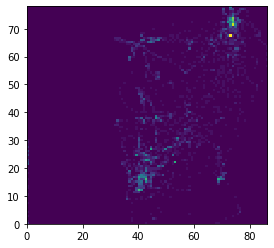

1203


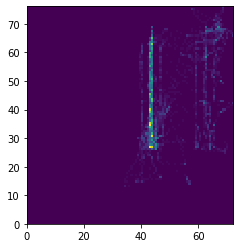

1177


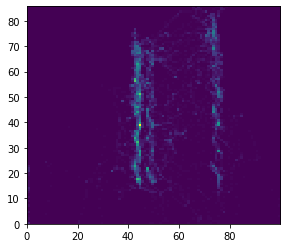

1162


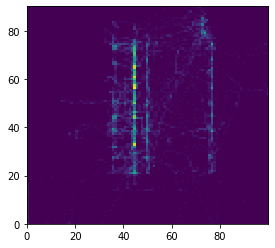

1166


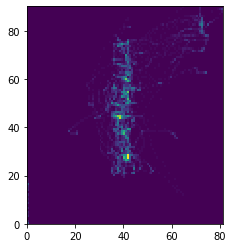

1163


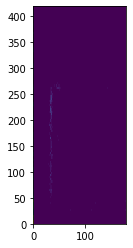

1175


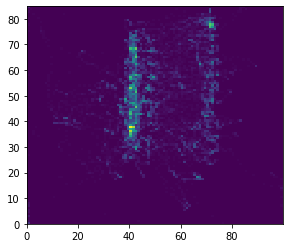

1194


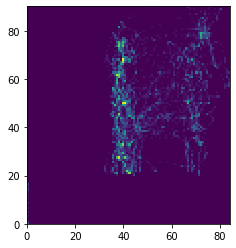

1160


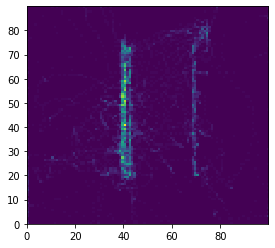

1191


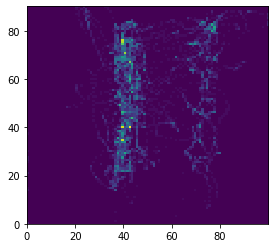

912


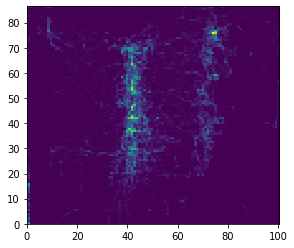

1185


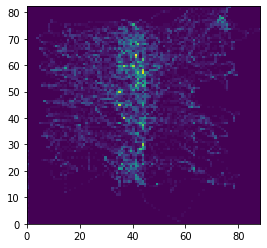

759


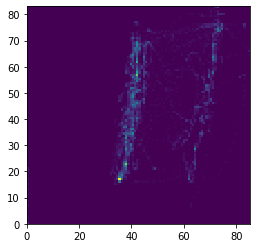

1200


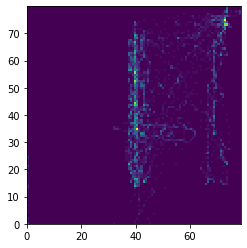

1198


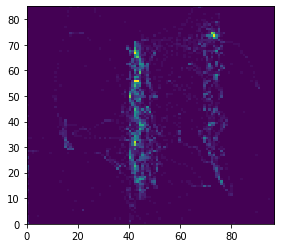

1167


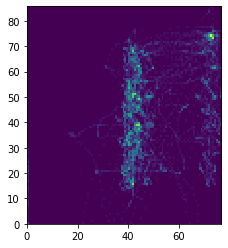

1189


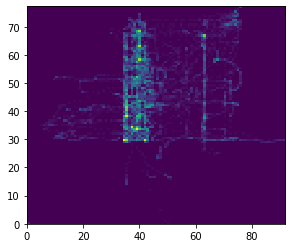

802


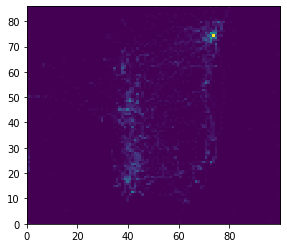

1180


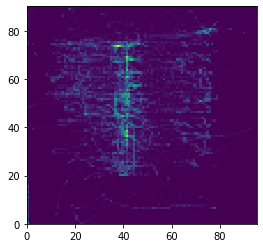

1209


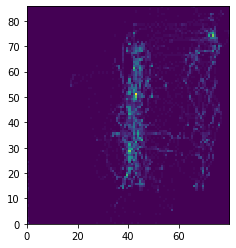

1202


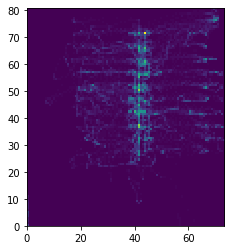

1204


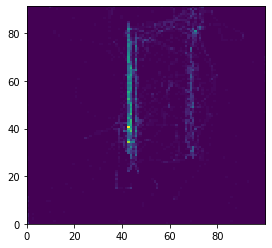

1188


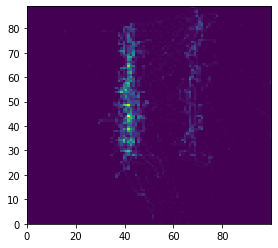

1210


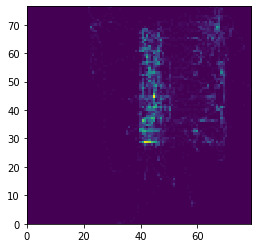

1208


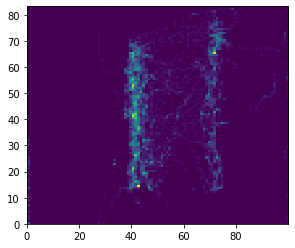

1206


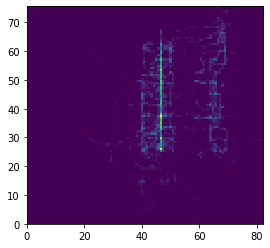

1211


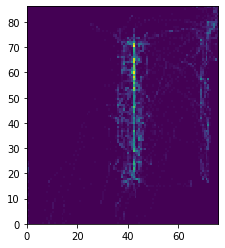

1172


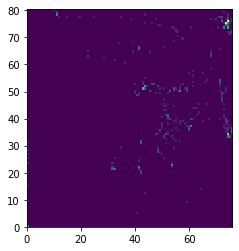

780


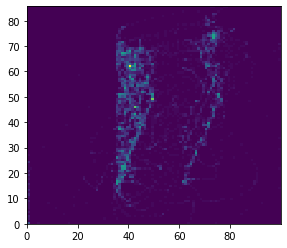

1220


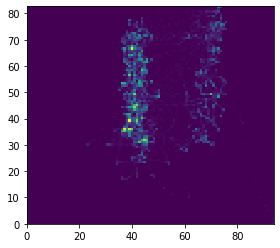

1170


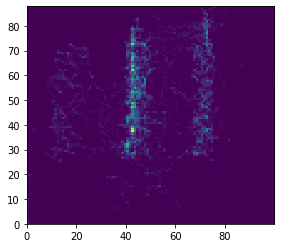

740


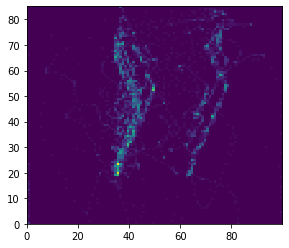

1193


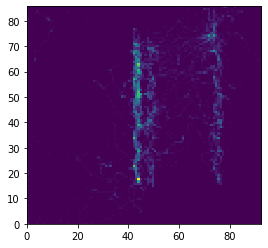

1141


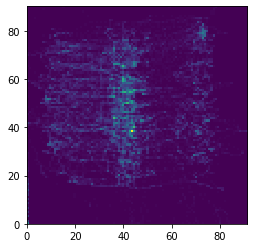

1224


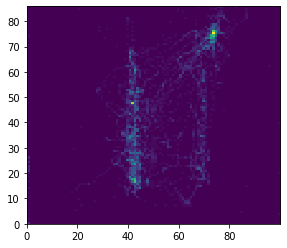

1213


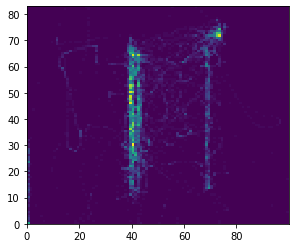

1199


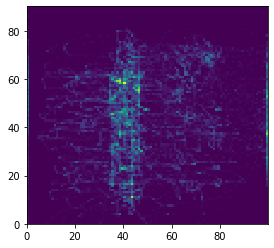

1218


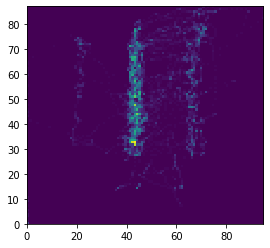

1190


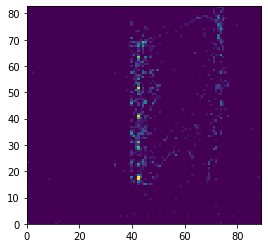

1219


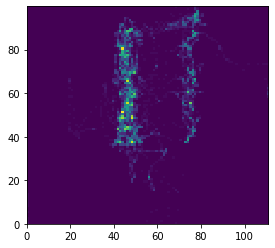

ValueError: autodetected range of [nan, nan] is not finite

In [7]:
for userid in mt.user_id.unique():
    overall_heatmap(userid)

**Mouse Movements Heatmap Per User**

In [8]:
def movements_heatmap (userid):
    user_cords=mt[mt.user_id==userid]
    cords=user_cords[['cord_x', 'cord_y', 'window_x', 'window_y']]
    user_movements=user_cords[user_cords.action=='m']
    
    x= user_movements['percent_cord_x'].to_numpy()
    y= user_movements['percent_cord_y'].to_numpy()
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    print(userid)
    plt.clf()
    plt.imshow(heatmap.T, extent=extent, origin='lower')
    plt.show()

365


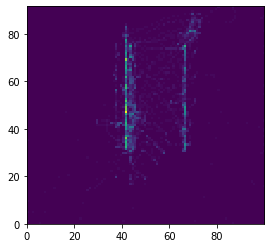

371


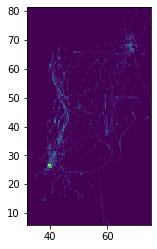

390


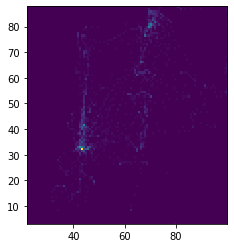

376


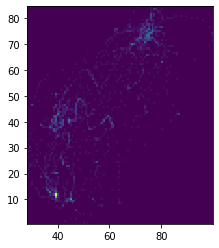

396


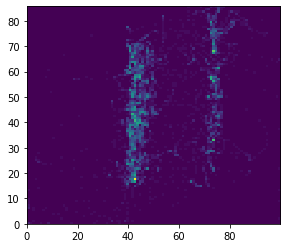

374


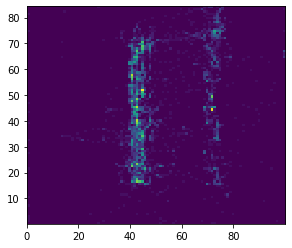

383


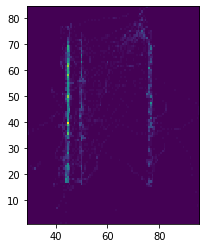

385


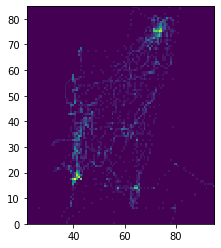

379


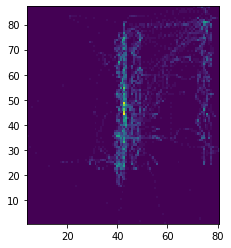

373


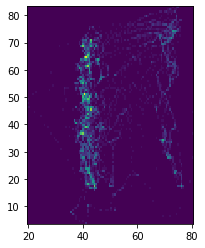

386


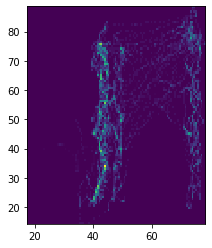

423


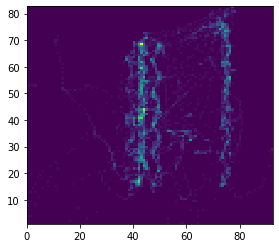

395


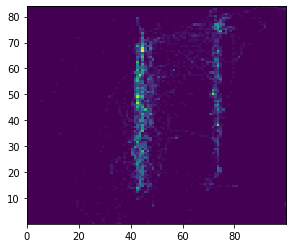

378


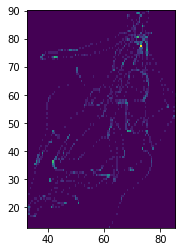

384


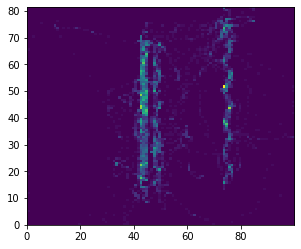

400


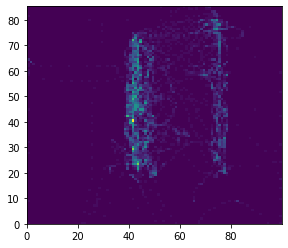

388


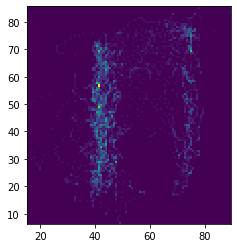

422


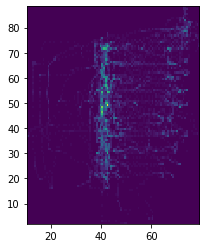

KeyboardInterrupt: 

In [9]:
for userid in mt.user_id.unique():
    movements_heatmap(userid)

**Clicks Heatmap Per User**

In [15]:
def clicks_heatmap (userid):
    user_cords=mt[mt.user_id==userid]
    cords=user_cords[['cord_x', 'cord_y', 'window_x', 'window_y']]
    user_clicks=user_cords[user_cords.action=='c']
    
    x= user_clicks['percent_cord_x'].to_numpy()
    y= user_clicks['percent_cord_y'].to_numpy()
    
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=100)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    print(userid)
    plt.clf()
    plt.imshow(heatmap.T, extent=extent, origin='lower')
    plt.show()

In [14]:
for userid in mt.user_id.unique():
    clicks_heatmap(userid)

NameError: name 'clicks_heatmap' is not defined

**Insights:**<br>
1. Both movement and click patterns vary from user to user.
2. On average, mouse movements are heavily concentrated on the left side of the screen.
3. Most of the mouse activity happens between x coordinates 400 and 1200 - varies depending on screen size.
4. A lot of the mouse movements and clicks form 2 clear vertical lines on the following x coordinates: 500-700 and 1000.

**Next steps:**<br>
1. It will be more insightful to analyze the movements based on the different parts of the survey, since the layout and location of response fields varies.
2. Analyze mouse movements and clicks depending on the different devices, i.e. screen size

### Scatterplots of Mouse Paths with Color Codes for Action Type

In [10]:
def action_type_scatter(userid):
    user_cords=mt[mt.user_id==userid]
    cords=user_cords[['cord_x', 'cord_y', 'window_x', 'window_y']]
    
    sns.lmplot( x="percent_cord_x", y="percent_cord_y", data=user_cords, fit_reg=False, hue='action', 
               legend=False, palette=dict(c="#CD5C5C", m="#E9967A", s="#FFA07A"))
 
    plt.legend(loc='lower right')
    print(userid)
    plt.show()

In [11]:
for userid in mt.user_id.unique():
    action_type_scatter(userid)

KeyError: 'np'